In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

import statsmodels.api as sm


In [62]:
data=pd.read_csv('https://data.ibb.gov.tr/dataset/3ee6d744-5da2-40c8-9cd6-0e3e41f1928f/resource/db9c7fb3-e7f9-435a-92f4-1b917e357821/download/traffic_density_202001.csv')

In [121]:
data3=data
data3

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
0,2020-01-03 13:00:00,28.844604,41.113586,sxk9bk,9,78,53,105
1,2020-01-16 07:00:00,29.152222,41.009216,sxk9r3,6,64,27,68
2,2020-01-17 20:00:00,28.471069,41.042175,sxk1rz,53,96,72,11
3,2020-01-14 22:00:00,29.360962,40.816956,sxkbhn,17,128,73,216
4,2020-01-17 20:00:00,28.844604,40.970764,sxk906,16,82,55,123
...,...,...,...,...,...,...,...,...
1328619,2020-01-04 11:00:00,28.383179,41.168518,sxk4jy,6,49,22,14
1328620,2020-01-08 15:00:00,28.218384,41.119080,sxk1fj,55,132,83,71
1328621,2020-01-04 12:00:00,28.086548,41.190491,sx7fr4,55,129,81,90
1328622,2020-01-22 14:00:00,28.987427,41.108093,sxk9ge,8,87,43,100


Tek bir lokasyonu aldım.

In [122]:
data3=data3[data3['GEOHASH']=='sxkbhn']
data3

,DATE_TIME,LONGITUDE,LATITUDE,GEOHASH,MINIMUM_SPEED,MAXIMUM_SPEED,AVERAGE_SPEED,NUMBER_OF_VEHICLES
3,2020-01-14 22:00:00,29.360962,40.816956,sxkbhn,17,128,73,216
2246,2020-01-19 22:00:00,29.360962,40.816956,sxkbhn,10,130,72,180
3190,2020-01-13 15:00:00,29.360962,40.816956,sxkbhn,27,116,71,238
5923,2020-01-21 01:00:00,29.360962,40.816956,sxkbhn,26,142,70,100
6415,2020-01-15 02:00:00,29.360962,40.816956,sxkbhn,19,131,77,77
...,...,...,...,...,...,...,...,...
1318864,2020-01-15 00:00:00,29.360962,40.816956,sxkbhn,29,126,71,196
1320390,2020-01-23 11:00:00,29.360962,40.816956,sxkbhn,14,110,62,233
1322555,2020-01-05 17:00:00,29.360962,40.816956,sxkbhn,10,144,75,173
1324763,2020-01-20 22:00:00,29.360962,40.816956,sxkbhn,25,135,70,225


In [123]:
data3=data3[['DATE_TIME','NUMBER_OF_VEHICLES']]
data3

,DATE_TIME,NUMBER_OF_VEHICLES
3,2020-01-14 22:00:00,216
2246,2020-01-19 22:00:00,180
3190,2020-01-13 15:00:00,238
5923,2020-01-21 01:00:00,100
6415,2020-01-15 02:00:00,77
...,...,...
1318864,2020-01-15 00:00:00,196
1320390,2020-01-23 11:00:00,233
1322555,2020-01-05 17:00:00,173
1324763,2020-01-20 22:00:00,225


In [124]:
data3.dtypes

DATE_TIME             object
NUMBER_OF_VEHICLES     int64
dtype: object

String olan sütunu zaman serisi olarak çevirdikten sonra indeks olarak atadım.

In [125]:
data3['DATE_TIME'] = pd.to_datetime(data3['DATE_TIME'])
data3.index=data3['DATE_TIME']
data3=data3.sort_index(axis=0)
data3

C:\Users\Engin\AppData\Local\Temp/ipykernel_17268/1793621116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['DATE_TIME'] = pd.to_datetime(data3['DATE_TIME'])


,DATE_TIME,NUMBER_OF_VEHICLES
DATE_TIME,,
2020-01-01 00:00:00,2020-01-01 00:00:00,96
2020-01-01 01:00:00,2020-01-01 01:00:00,60
2020-01-01 02:00:00,2020-01-01 02:00:00,58
2020-01-01 03:00:00,2020-01-01 03:00:00,52
2020-01-01 04:00:00,2020-01-01 04:00:00,36
...,...,...
2020-01-31 19:00:00,2020-01-31 19:00:00,331
2020-01-31 20:00:00,2020-01-31 20:00:00,328
2020-01-31 21:00:00,2020-01-31 21:00:00,244


In [126]:
data3=data3.sort_index(axis=0)
data3

,DATE_TIME,NUMBER_OF_VEHICLES
DATE_TIME,,
2020-01-01 00:00:00,2020-01-01 00:00:00,96
2020-01-01 01:00:00,2020-01-01 01:00:00,60
2020-01-01 02:00:00,2020-01-01 02:00:00,58
2020-01-01 03:00:00,2020-01-01 03:00:00,52
2020-01-01 04:00:00,2020-01-01 04:00:00,36
...,...,...
2020-01-31 19:00:00,2020-01-31 19:00:00,331
2020-01-31 20:00:00,2020-01-31 20:00:00,328
2020-01-31 21:00:00,2020-01-31 21:00:00,244


In [127]:
data3=data3.drop(['DATE_TIME'],axis=1)
data3

,NUMBER_OF_VEHICLES
DATE_TIME,
2020-01-01 00:00:00,96
2020-01-01 01:00:00,60
2020-01-01 02:00:00,58
2020-01-01 03:00:00,52
2020-01-01 04:00:00,36
...,...
2020-01-31 19:00:00,331
2020-01-31 20:00:00,328
2020-01-31 21:00:00,244


Veride belirtilen zamanlarda eksik değer bulunmamakta.

In [128]:
check_nan = data3['NUMBER_OF_VEHICLES'].isnull().values.any()
check_nan

False

Ama veride eksik saatler bulunmakta.

In [129]:
my_range = pd.date_range(start="2020-01-01 00:00:00", end="2020-01-31 23:00:00", freq='H')
my_range.difference(data3.index)

DatetimeIndex(['2020-01-26 09:00:00', '2020-01-26 12:00:00',
               '2020-01-31 07:00:00', '2020-01-31 08:00:00'],
              dtype='datetime64[ns]', freq=None)

Eksik saatleri asfreq fonksiyonu ile tamamladım.

In [130]:
data3=data3.asfreq('H')

Oluşturulan satırların 'NUMBER_OF_VEHICLES' sütunu null değerler içermekte.

In [131]:
check_nan = data3['NUMBER_OF_VEHICLES'].isnull().values.any()
check_nan

True

In [133]:
lis=data3[data3['NUMBER_OF_VEHICLES'].isnull()].index.tolist()
lis

[Timestamp('2020-01-26 09:00:00'),
 Timestamp('2020-01-26 12:00:00'),
 Timestamp('2020-01-31 07:00:00'),
 Timestamp('2020-01-31 08:00:00')]

Null değerlerin olduğu satırların bir sonraki ve bir önceki indekslerindeki değerlerin ortalamalarını eksik değerlere atadım. Eğer önceki veya sonraki değer de null ise +-1 sonraki indeks ile işleme devam ettim.

In [134]:
for i in lis:
    index=data3.index.get_loc(i)
    if np.isnan(data3.iloc[index+1]['NUMBER_OF_VEHICLES']) or np.isnan(data3.iloc[index-1]['NUMBER_OF_VEHICLES']):
        
        y=index+1
        z=index-1
        if np.isnan(data3.iloc[y]['NUMBER_OF_VEHICLES']):
            y=index+1
            while np.isnan(data3.iloc[y]['NUMBER_OF_VEHICLES']):
                y=y+1
        if np.isnan(data3.iloc[z]['NUMBER_OF_VEHICLES']):
            z=index-1
            while np.isnan(data3.iloc[z]['NUMBER_OF_VEHICLES']):
                z=z-1
        ort=(data3.iloc[y]['NUMBER_OF_VEHICLES'] + data3.iloc[z]['NUMBER_OF_VEHICLES'])/2 
        data3.iloc[index]['NUMBER_OF_VEHICLES']=ort
        
    else:
        ort=(data3.iloc[index+1]['NUMBER_OF_VEHICLES']+data3.iloc[index-1]['NUMBER_OF_VEHICLES'])/2
        data3.iloc[index]['NUMBER_OF_VEHICLES']=ort
        
            

In [135]:
check_nan = data3.isnull().values.any()
check_nan

False

In [136]:
my_range = pd.date_range(start="2020-01-01 00:00:00", end="2020-01-31 23:00:00", freq='H')
my_range.difference(data3.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='H')

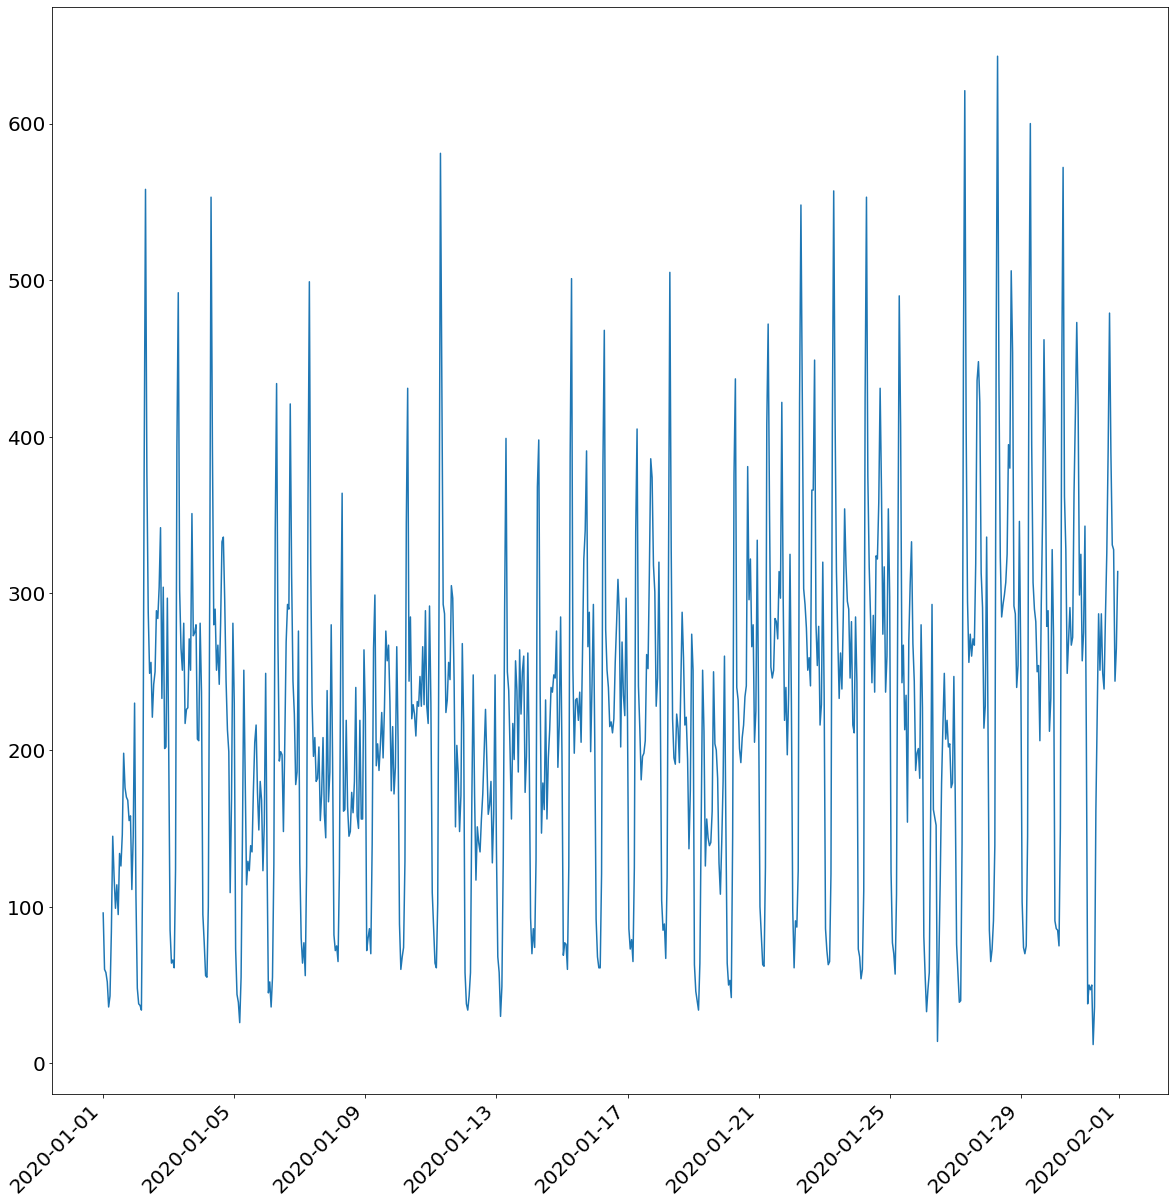

In [137]:
plt.figure(figsize=(20, 20))
plt.rcParams["font.size"] =20
plt.xticks(rotation=45, ha='right')
plt.plot(data3)

Modeli kurmadan önce verinin durağan olması gerekli. Grafikte mevsimsellik rahat bir şekilde görülebilse de daha iyi bir görüş için hareketli ortalamalar metodunu kullanarak gürültülerden kurtuldum. 

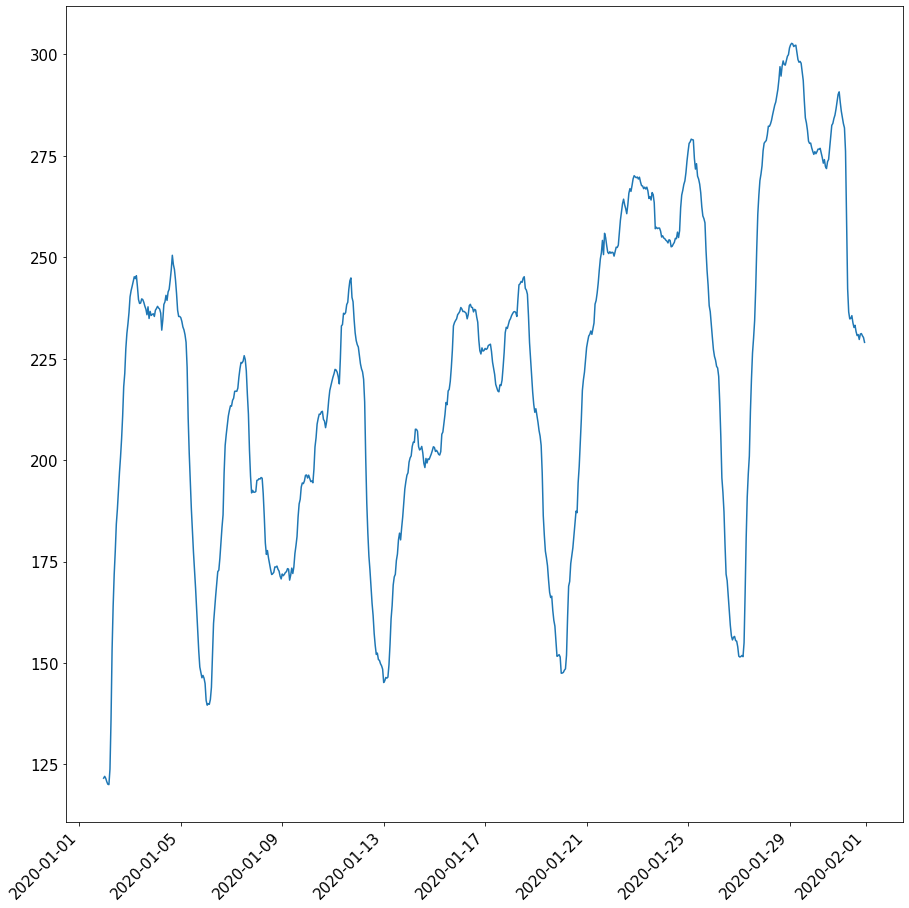

In [138]:
rol=data3.rolling(window=24).mean()
plt.figure(figsize=(15, 15))
plt.rcParams["font.size"] =15
plt.xticks(rotation=45, ha='right')
plt.plot(rol)

In [140]:
rol.head(30)

,NUMBER_OF_VEHICLES
DATE_TIME,
2020-01-01 00:00:00,NaN
2020-01-01 01:00:00,NaN
2020-01-01 02:00:00,NaN
2020-01-01 03:00:00,NaN
2020-01-01 04:00:00,NaN
2020-01-01 05:00:00,NaN
2020-01-01 06:00:00,NaN
2020-01-01 07:00:00,NaN
2020-01-01 08:00:00,NaN


Yukarı doğru bir trend ve mevsimsellik rahat bir şekilde görülebilmekte. Modeli kurmadan önce bunlardan kurtulmalıyız.

In [141]:
rol=rol[23:]
rol.head(30)

,NUMBER_OF_VEHICLES
DATE_TIME,
2020-01-01 23:00:00,121.583333
2020-01-02 00:00:00,122.041667
2020-01-02 01:00:00,121.541667
2020-01-02 02:00:00,120.708333
2020-01-02 03:00:00,120.083333
2020-01-02 04:00:00,120.000000
2020-01-02 05:00:00,123.833333
2020-01-02 06:00:00,136.041667
2020-01-02 07:00:00,153.250000


In [142]:
check_nan = rol['NUMBER_OF_VEHICLES'].isnull().values.any()
check_nan

False

In [143]:
X = rol['NUMBER_OF_VEHICLES'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -4.329217
p-value: 0.000395


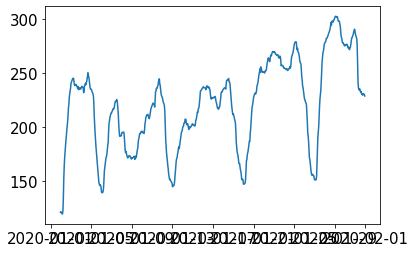

In [145]:
plt.plot(rol)

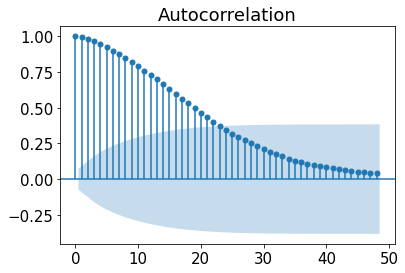

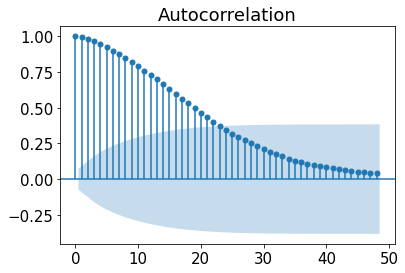

In [146]:
plot_acf(rol['NUMBER_OF_VEHICLES'], lags= 48)

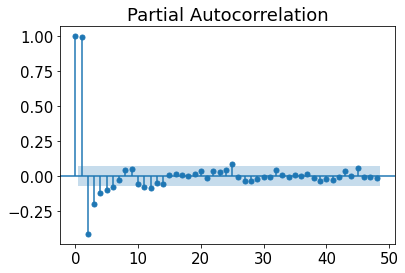

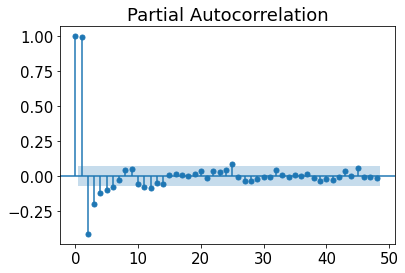

In [147]:
plot_pacf(rol['NUMBER_OF_VEHICLES'], lags= 48)

In [130]:
rol2=rol1['NUMBER_OF_VEHICLES'].resample('H').sum()
rol2.head(20)

DATE_TIME
2020-01-02 06:00:00    23.208333
2020-01-02 07:00:00    24.416667
2020-01-02 08:00:00    25.958333
2020-01-02 09:00:00    29.333333
2020-01-02 10:00:00    31.750000
2020-01-02 11:00:00    34.500000
2020-01-02 12:00:00    36.375000
2020-01-02 13:00:00    37.333333
2020-01-02 14:00:00    39.416667
2020-01-02 15:00:00    41.166667
2020-01-02 16:00:00    42.166667
2020-01-02 17:00:00    41.916667
2020-01-02 18:00:00    42.458333
2020-01-02 19:00:00    43.208333
2020-01-02 20:00:00    45.083333
2020-01-02 21:00:00    46.416667
2020-01-02 22:00:00    47.791667
2020-01-02 23:00:00    49.083333
2020-01-03 00:00:00    49.750000
2020-01-03 01:00:00    50.250000
Freq: H, Name: NUMBER_OF_VEHICLES, dtype: float64

In [292]:
data3 = data3.asfreq('H')

In [149]:
train=data3[:690]
test=data3[690:]


In [151]:
len(train),len(test)

(690, 54)

In [152]:
model=ARIMA(train,order=(2,1,1)).fit()


In [153]:
pred=model.predict(start=len(train),end=(len(data3)-1))

In [154]:
pred

2020-01-29 18:00:00    422.612800
2020-01-29 19:00:00    339.753467
2020-01-29 20:00:00    274.741698
2020-01-29 21:00:00    244.383196
2020-01-29 22:00:00    240.667241
2020-01-29 23:00:00    249.115678
2020-01-30 00:00:00    258.817421
2020-01-30 01:00:00    264.904541
2020-01-30 02:00:00    266.974577
2020-01-30 03:00:00    266.570488
2020-01-30 04:00:00    265.354354
2020-01-30 05:00:00    264.331015
2020-01-30 06:00:00    263.818114
2020-01-30 07:00:00    263.725517
2020-01-30 08:00:00    263.839224
2020-01-30 09:00:00    263.986724
2020-01-30 10:00:00    264.085127
2020-01-30 11:00:00    264.122302
2020-01-30 12:00:00    264.119382
2020-01-30 13:00:00    264.101764
2020-01-30 14:00:00    264.085773
2020-01-30 15:00:00    264.077208
2020-01-30 16:00:00    264.075225
2020-01-30 17:00:00    264.076698
2020-01-30 18:00:00    264.078921
2020-01-30 19:00:00    264.080500
2020-01-30 20:00:00    264.081153
2020-01-30 21:00:00    264.081161
2020-01-30 22:00:00    264.080910
2020-01-30 23:

<AxesSubplot:>

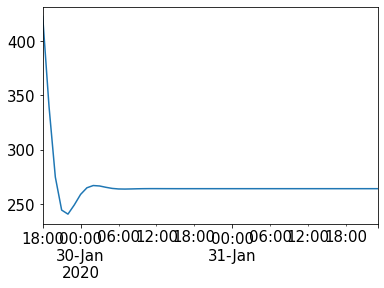

In [155]:
pred.plot()

<AxesSubplot:xlabel='DATE_TIME'>

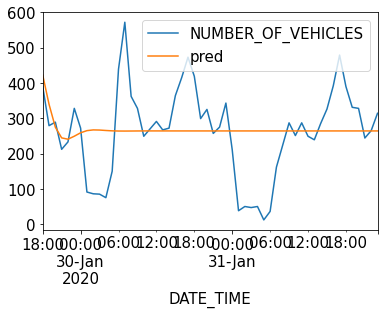

In [156]:
test.plot(legend=True,label='test')
pred.plot(legend=True,label='pred')